A Chinese automobile company Teclov_chinese aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. 

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
sns.set(rc={'figure.figsize':(10,6)})

In [ ]:
pd.pandas.set_option('display.max_columns',None)


In [ ]:
car = pd.read_csv('/content/CarPrice_ML.csv')

In [ ]:
car.shape

(205, 26)

In [ ]:
car.size

5330

In [ ]:
car.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [ ]:
car.tail(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
195,196,-1,volvo 144ea,gas,std,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3034,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415.0
196,197,-2,volvo 244dl,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,56.2,2935,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985.0
197,198,-1,volvo 245,gas,std,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3042,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515.0
198,199,-2,volvo 264gl,gas,turbo,four,sedan,rwd,front,104.3,188.8,67.2,56.2,3045,ohc,four,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420.0
199,200,-1,volvo diesel,gas,turbo,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3157,ohc,four,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950.0
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
category = ['car_ID','symboling', 'CarName', 'fueltype', 'aspiration','doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype','cylindernumber', 'fuelsystem']
for i in category:
    car[i] = car[i].astype('category')

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   car_ID            205 non-null    category
 1   symboling         205 non-null    category
 2   CarName           205 non-null    category
 3   fueltype          205 non-null    category
 4   aspiration        205 non-null    category
 5   doornumber        205 non-null    category
 6   carbody           205 non-null    category
 7   drivewheel        205 non-null    category
 8   enginelocation    205 non-null    category
 9   wheelbase         205 non-null    float64 
 10  carlength         205 non-null    float64 
 11  carwidth          205 non-null    float64 
 12  carheight         205 non-null    float64 
 13  curbweight        205 non-null    int64   
 14  enginetype        205 non-null    category
 15  cylindernumber    205 non-null    category
 16  enginesize        205 non-

In [ ]:
car.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [ ]:
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

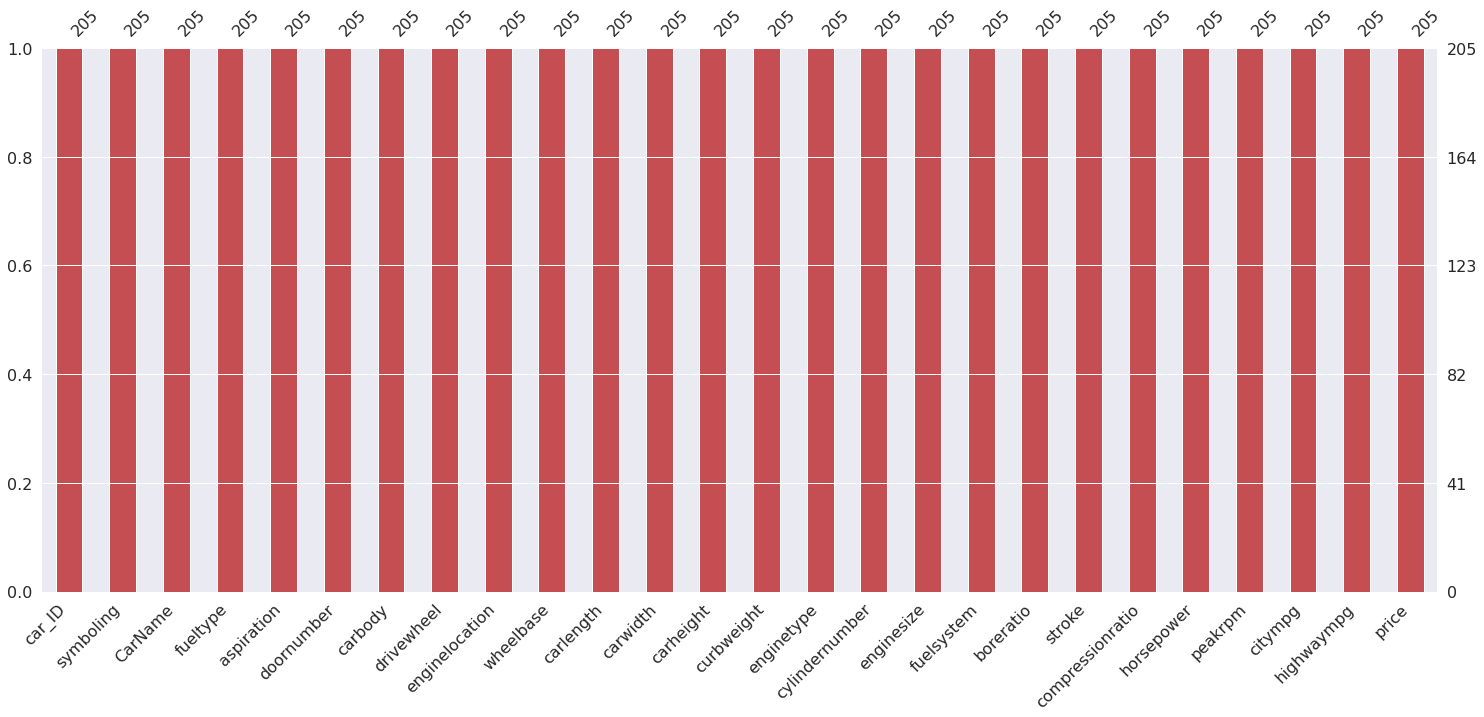

In [ ]:
msno.bar(car, color='r')

In [ ]:
car.duplicated().sum()

0

In [ ]:
numeric = ['wheelbase','carlength', 'carwidth', 'carheight', 'curbweight',
           'enginesize', 'boreratio', 'stroke','compressionratio', 
           'horsepower', 'peakrpm', 'citympg', 'highwaympg','price']

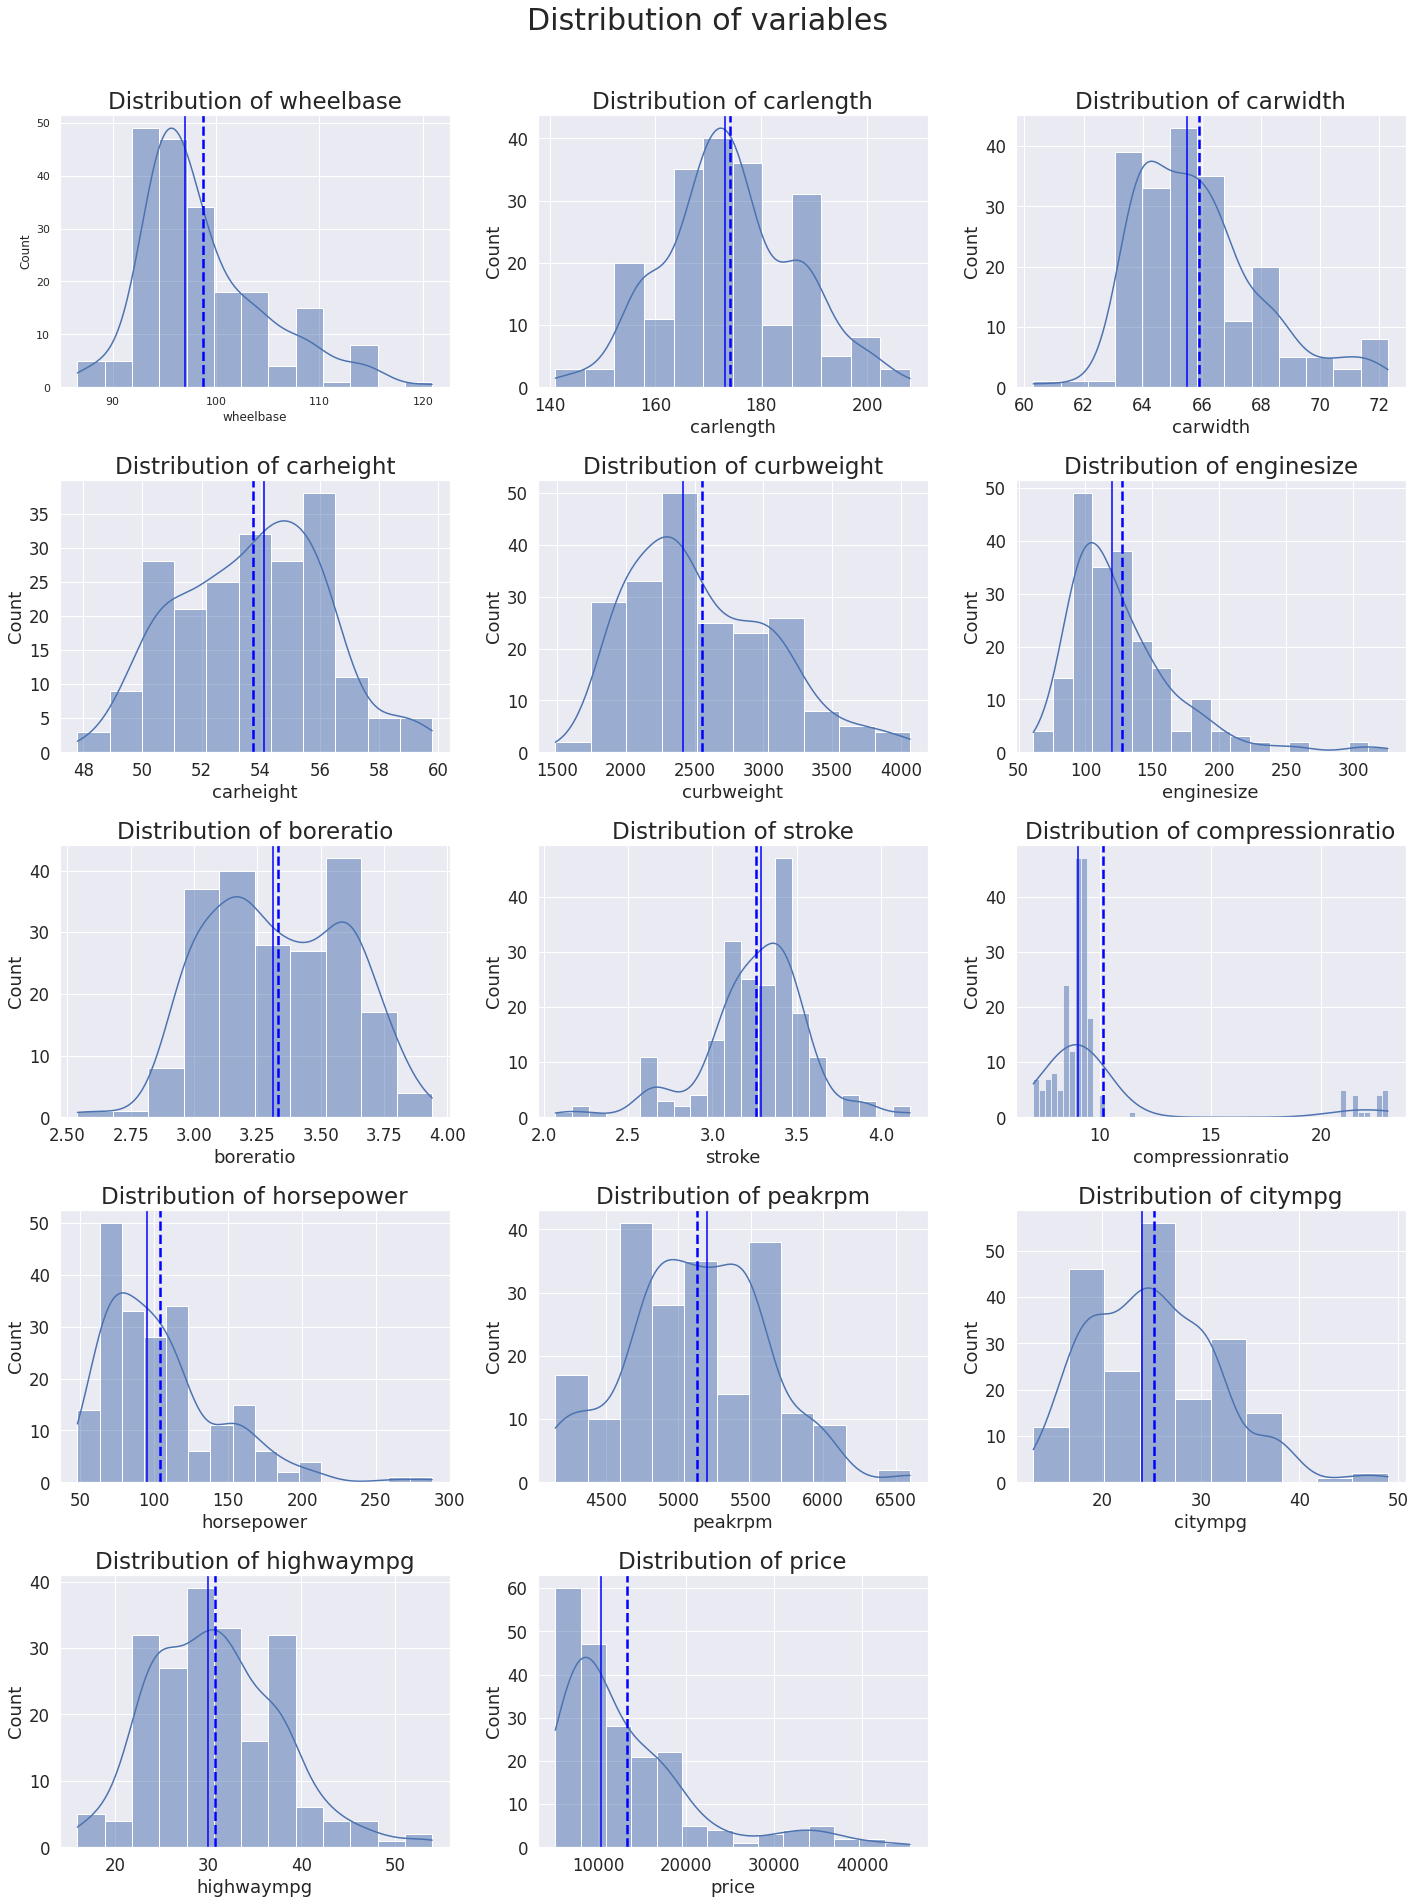

In [ ]:
n=1
plt.subplots(figsize=(20, 30))
for i in numeric:
    plt.subplot(6,3,n)
    ax = plt.gca()
    sns.set(font_scale = 1.5)
    sns.histplot(car[i],kde=True, palette='Set3')    
    ax.set_title('Distribution of %s'%(i), fontsize=23)
    plt.axvline(x=car[i].mean(),ls='--',lw=2.5, color='blue',label='mean')
    plt.axvline(x=car[i].median(), color='blue',label='medain')
    n+=1 
    plt.tight_layout()
plt.suptitle('Distribution of variables', y=1.03, fontsize=30)
plt.show()

In [ ]:
car[numeric].skew()


wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

In [ ]:
data_transform = ['wheelbase','carwidth','curbweight', 'enginesize','stroke',
                  'compressionratio', 'horsepower','citympg','highwaympg', 'price']

In [ ]:
car_log = car.copy(deep=True)
for i in data_transform:
    car_log[i] = np.log(car_log[i]+1)
car_log[numeric].skew()

wheelbase           0.885024
carlength           0.155954
carwidth            0.815331
carheight           0.063123
curbweight          0.270250
enginesize          0.864706
boreratio           0.020156
stroke             -1.113773
compressionratio    2.379056
horsepower          0.489938
peakrpm             0.075159
citympg             0.026578
highwaympg         -0.099773
price               0.672964
dtype: float64

In [ ]:
car_sqrt = car.copy(deep=True)
for i in data_transform:
    car_sqrt[i] = np.sqrt(car_sqrt[i])
car_sqrt[numeric].skew()

wheelbase           0.966772
carlength           0.155954
carwidth            0.859087
carheight           0.063123
curbweight          0.473846
enginesize          1.364372
boreratio           0.020156
stroke             -0.970015
compressionratio    2.505819
horsepower          0.899857
peakrpm             0.075159
citympg             0.316761
highwaympg          0.208411
price               1.204620
dtype: float64

In [ ]:
car_cbrt = car.copy(deep=True)
for i in data_transform:
    car_cbrt[i] = np.cbrt(car_cbrt[i])
car_cbrt[numeric].skew()

wheelbase           0.938982
carlength           0.155954
carwidth            0.844077
carheight           0.063123
curbweight          0.405672
enginesize          1.187978
boreratio           0.020156
stroke             -1.065557
compressionratio    2.460265
horsepower          0.752902
peakrpm             0.075159
citympg             0.209018
highwaympg          0.098633
price               1.021018
dtype: float64

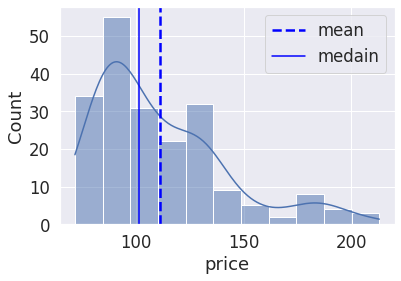

In [ ]:
#Sqrt
sqrt_price = np.sqrt(car['price'])
sns.histplot(sqrt_price,kde=True,edgecolor = 'white')
plt.axvline(x=sqrt_price.mean(),ls='--',lw=2.5, color='blue',label='mean')
plt.axvline(x=sqrt_price.median(), color='blue',label='medain')
plt.legend()

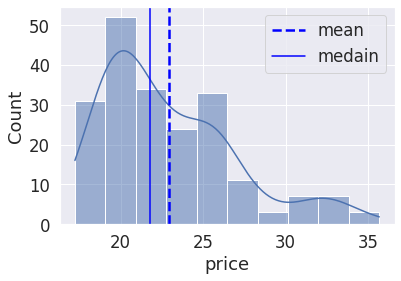

In [ ]:
#cbrt
cbrt_price = np.cbrt(car['price'])
sns.histplot(cbrt_price,kde=True,edgecolor = 'white')
plt.axvline(x=cbrt_price.mean(),ls='--',lw=2.5, color='blue',label='mean')
plt.axvline(x=cbrt_price.median(), color='blue',label='medain')
plt.legend()

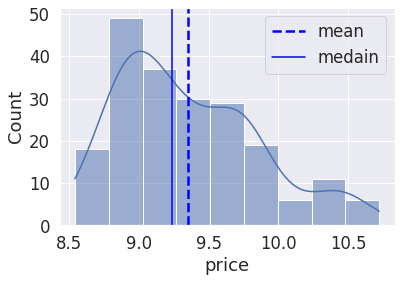

In [ ]:
#log
log_price = np.log(car['price'])
sns.histplot(log_price,kde=True,edgecolor = 'white')
plt.axvline(x=log_price.mean(),ls='--',lw=2.5, color='blue',label='mean')
plt.axvline(x=log_price.median(), color='blue',label='medain')
plt.legend()

In [ ]:
 car1 = car.copy()
 car1.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
#Box cox
from scipy.stats import boxcox
car1.insert(len(car1.columns), 'price_boxcox', boxcox(car1.iloc[:, 25])[0])

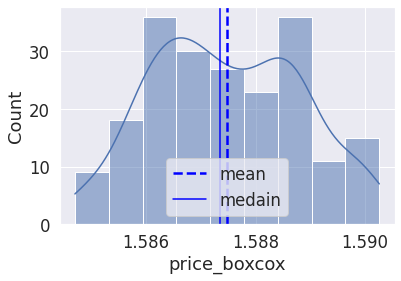

In [ ]:
sns.histplot(car1['price_boxcox'],kde=True,edgecolor = 'white')
plt.axvline(x=car1['price_boxcox'].mean(),ls='--',lw=2.5, color='blue',label='mean')
plt.axvline(x=car1['price_boxcox'].median(), color='blue',label='medain')
plt.legend()

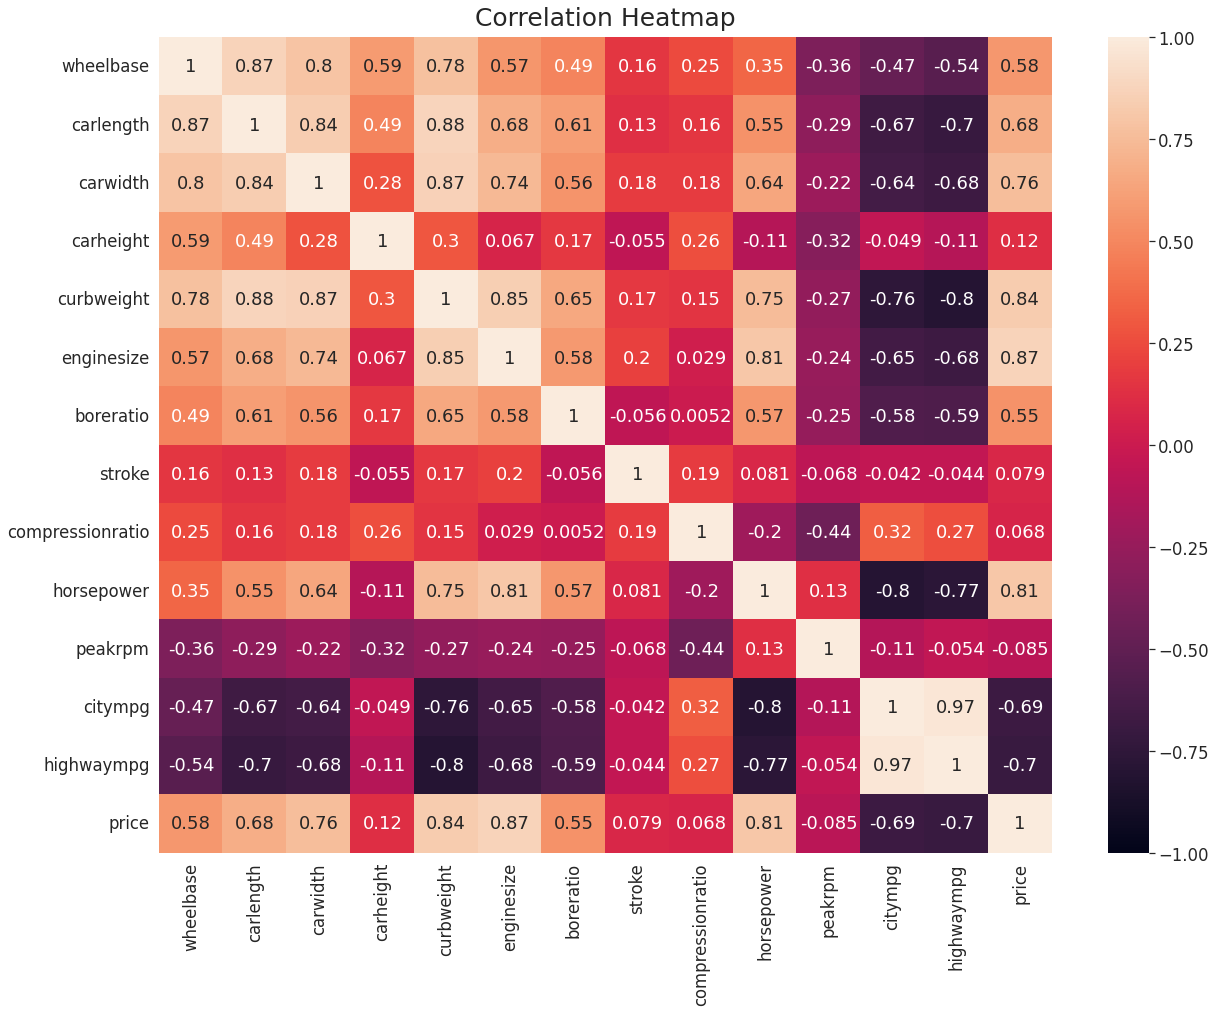

In [ ]:
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(car.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':25}, pad=12);

## Selecting the X and Y variables.

In [ ]:
x = car[['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower']]
y = car[['price']]

In [ ]:
x.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower
0,88.6,168.8,64.1,2548,130,3.47,111
1,88.6,168.8,64.1,2548,130,3.47,111
2,94.5,171.2,65.5,2823,152,2.68,154
3,99.8,176.6,66.2,2337,109,3.19,102
4,99.4,176.6,66.4,2824,136,3.19,115


In [ ]:
y.head()

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0


## Scaling the X variable.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

## Splitting Test and Train Dataset.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=101)

## Training the model.

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_train)

In [ ]:
r2 = r2_score(y_true=y_train, y_pred=y_pred)
print(r2)

0.8157668065739119


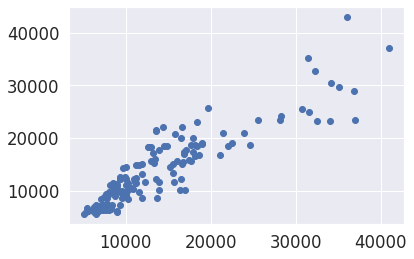

In [ ]:
plt.scatter(y_train,y_pred)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_train, y_pred))
print('MSE:', metrics.mean_squared_error(y_train, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

MAE: 2367.79156923632
MSE: 11111894.592583852
RMSE: 3333.450853482597


In [ ]:
prediction = model.predict(x_test)

In [ ]:
r2 = r2_score(y_true=y_test, y_pred=prediction)
print(r2)

0.8226643384207748


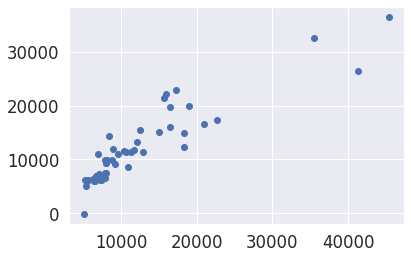

In [ ]:
plt.scatter(y_test,prediction)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 2245.308867525979
MSE: 12585480.680904686
RMSE: 3547.602102956966


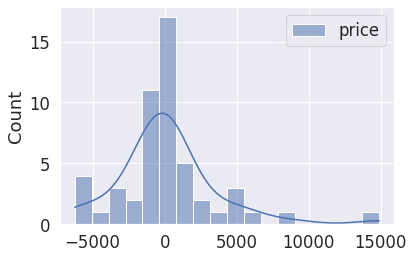

In [ ]:
sns.histplot(y_test-prediction, kde=True)

## Savning Model

In [ ]:
from joblib import dump, load

In [ ]:
dump(model, 'Car_Price.joblib')

['Car_Price.joblib']